In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

from tensorflow.config import experimental

In [13]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18341742780242657629
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5457073284242110853
physical_device_desc: "device: XLA_CPU device"
]


In [2]:
urldb = '/home/henri/Documents/Lighthouse-lab/Databases/w8-d2-db/dataset/dataset/'
typedb = ['test_set','training_set']
animal = ['cats','dogs']

In [11]:
print("Num GPUs Available: ", len(experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


[CNN tutorial](https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd)

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
_________________________________________________________________


If our dataset is low we can use tensorflow

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(urldb + typedb[1],
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(urldb + typedb[0],
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps=50)

Epoch 1/20
100/100 [==============================] - 18s 183ms/step - loss: 0.5699 - accuracy: 0.7144 - val_loss: 0.5696 - val_accuracy: 0.6970
Epoch 2/20
100/100 [==============================] - 18s 182ms/step - loss: 0.5592 - accuracy: 0.7191 - val_loss: 0.5667 - val_accuracy: 0.7077
Epoch 3/20
100/100 [==============================] - 18s 183ms/step - loss: 0.5701 - accuracy: 0.7022 - val_loss: 0.5668 - val_accuracy: 0.7115
Epoch 4/20
100/100 [==============================] - 20s 198ms/step - loss: 0.5641 - accuracy: 0.7184 - val_loss: 0.5596 - val_accuracy: 0.7237
Epoch 5/20
100/100 [==============================] - 20s 205ms/step - loss: 0.5449 - accuracy: 0.7247 - val_loss: 0.5904 - val_accuracy: 0.6989
Epoch 6/20
100/100 [==============================] - 20s 198ms/step - loss: 0.5484 - accuracy: 0.7278 - val_loss: 0.5661 - val_accuracy: 0.7083
Epoch 7/20
100/100 [==============================] - 21s 210ms/step - loss: 0.5421 - accuracy: 0.7269 - val_loss: 0.5297 - val_ac

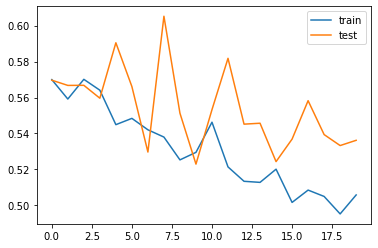

In [20]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading iamge from the disk
test_img_list = ['cat2.jpg','cat3.jpg']
  
test_image = image.load_img(test_img_list[1],target_size = (64,64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

if result[0][0] >= .5:
    prediction = 'doggo'
else:
    prediction = 'catto'
print (prediction)

catto
